In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv'
df = pd.read_csv(url)
df.sample(5)

,TV,Radio,Newspaper,Sales
148,38.0,40.3,11.9,10.9
66,31.5,24.6,2.2,11.0
156,93.9,43.5,50.5,15.3
170,50.0,11.6,18.4,8.4
50,199.8,3.1,34.6,16.4


In [9]:
print("\nInfo about dataset")
print(df.info())
print("\nShape of the dataset")
print(df.shape)
print("\nStatistics of the dataset")
print(df.describe())


Info about dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Shape of the dataset
(200, 4)

Statistics of the dataset
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


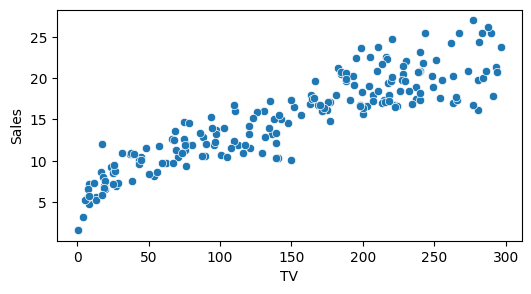

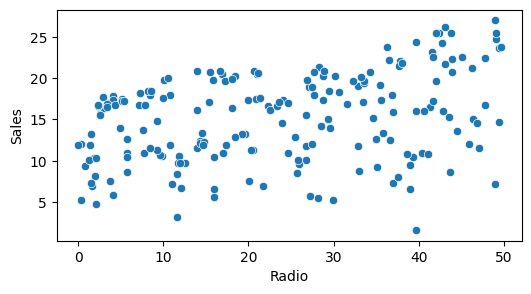

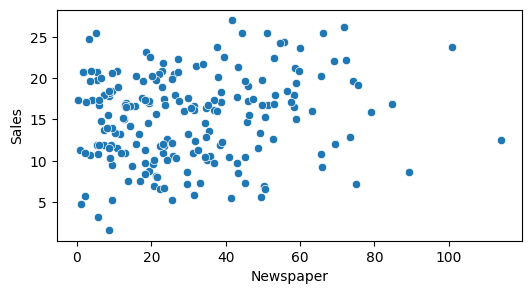

In [15]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.show()

plt.figure(figsize=(6,3))
sns.scatterplot(data=df, x='Radio', y='Sales')
plt.show()

plt.figure(figsize=(6,3))
sns.scatterplot(data=df, x='Newspaper', y='Sales')
plt.show()

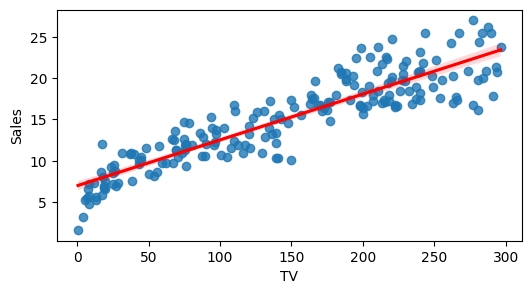

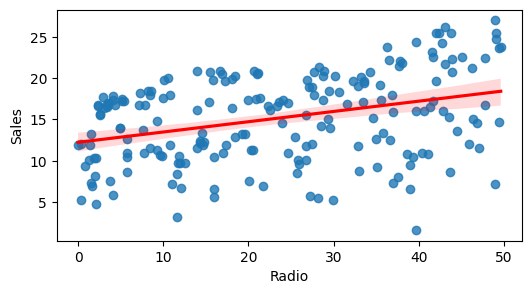

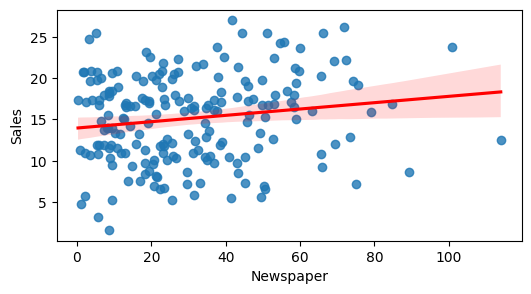

In [18]:
plt.figure(figsize=(6,3))
sns.regplot(data=df, x='TV', y='Sales', line_kws={"color": "red"})
plt.show()

plt.figure(figsize=(6,3))
sns.regplot(data=df, x='Radio', y='Sales', line_kws={"color": "red"})
plt.show()

plt.figure(figsize=(6,3))
sns.regplot(data=df, x='Newspaper', y='Sales', line_kws={"color": "red"})
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Sales'], axis = 1)
y = df['Sales']

sc = StandardScaler()
X = sc.fit_transform(X)

train_set, test_set = train_test_split(df, test_size = 0.10, random_state = 5)

In [26]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

xtrain = np.asanyarray(train_set[['TV']])
ytrain = np.asanyarray(train_set[['Sales']])

LR_model.fit(xtrain, ytrain)

theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]

print(f"theta1:", theta1)
print(f"theta0:", theta0)

theta1: 0.05590223498666597
theta0: 6.90167419589255


Text(0, 0.5, 'Sales')

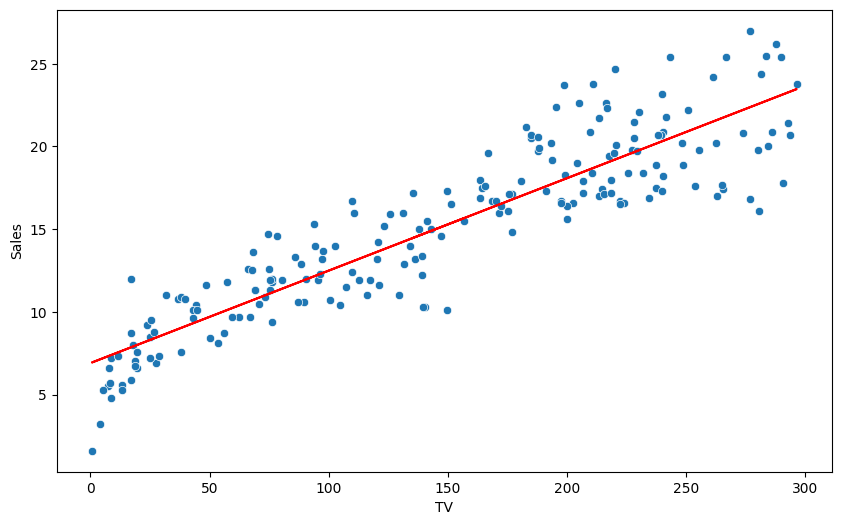

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.plot(xtrain, theta1*xtrain + theta0, '-r')
plt.xlabel("TV")
plt.ylabel("Sales")

In [29]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])

In [30]:
y_predict = LR_model.predict(x_test)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=1.8116406480373222
RMSE=2.1584337868618384
